In [45]:
#importmodules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlibinline
import seaborn as sns
import random

In [47]:
#讀檔
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [48]:
df.info()
''' 0   PassengerId  乘客編號
 1   HomePlanet    乘客離開的星球
 2   CryoSleep    乘客是否選擇在航程期間處於假死狀態
 3   Cabin      乘客所居住的艙室號碼
 4   Destination   乘客將要登陸的星球
 5   Age       乘客的年齡
 6   VIP       旅客是否在航程中支付了特殊VIP服務費用
 7   RoomService   乘客在泰坦尼克號太空船的眾多豪華設施中所支付的費用
 8   FoodCourt    乘客在泰坦尼克號太空船的眾多豪華設施中所支付的費用
 9   ShoppingMall   乘客在泰坦尼克號太空船的眾多豪華設施中所支付的費用
 10  Spa        乘客在泰坦尼克號太空船的眾多豪華設施中所支付的費用
 11  VRDeck      乘客在泰坦尼克號太空船的眾多豪華設施中所支付的費用
 12  Name       乘客的名字和姓氏
 13  Transported    目標是否存活(Flase:否、True：是)
  '''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


' 0   PassengerId  乘客編號\n 1   HomePlanet    乘客離開的星球\n 2   CryoSleep    乘客是否選擇在航程期間處於假死狀態\n 3   Cabin      乘客所居住的艙室號碼 \n 4   Destination   乘客將要登陸的星球\n 5   Age       乘客的年齡   \n 6   VIP       旅客是否在航程中支付了特殊VIP服務費用  \n 7   RoomService   乘客在泰坦尼克號太空船的眾多豪華設施中所支付的費用\n 8   FoodCourt    乘客在泰坦尼克號太空船的眾多豪華設施中所支付的費用\n 9   ShoppingMall   乘客在泰坦尼克號太空船的眾多豪華設施中所支付的費用\n 10  Spa        乘客在泰坦尼克號太空船的眾多豪華設施中所支付的費用\n 11  VRDeck      乘客在泰坦尼克號太空船的眾多豪華設施中所支付的費用\n 12  Name       乘客的名字和姓氏    \n 13  Transported    目標是否存活(Flase:否、True：是)\n  '

In [49]:
train_df.isnull().sum()
#Handle missing values

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [50]:
test_df.isnull().sum()
#Handle missing values

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [51]:
y = train_df.loc[:, ['Transported']]
train_df = train_df.drop('Transported', axis = 1)
y = np.ravel(y)
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>],
       [<Axes: title={'center': 'FoodCourt'}>,
        <Axes: title={'center': 'ShoppingMall'}>],
       [<Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>]], dtype=object)

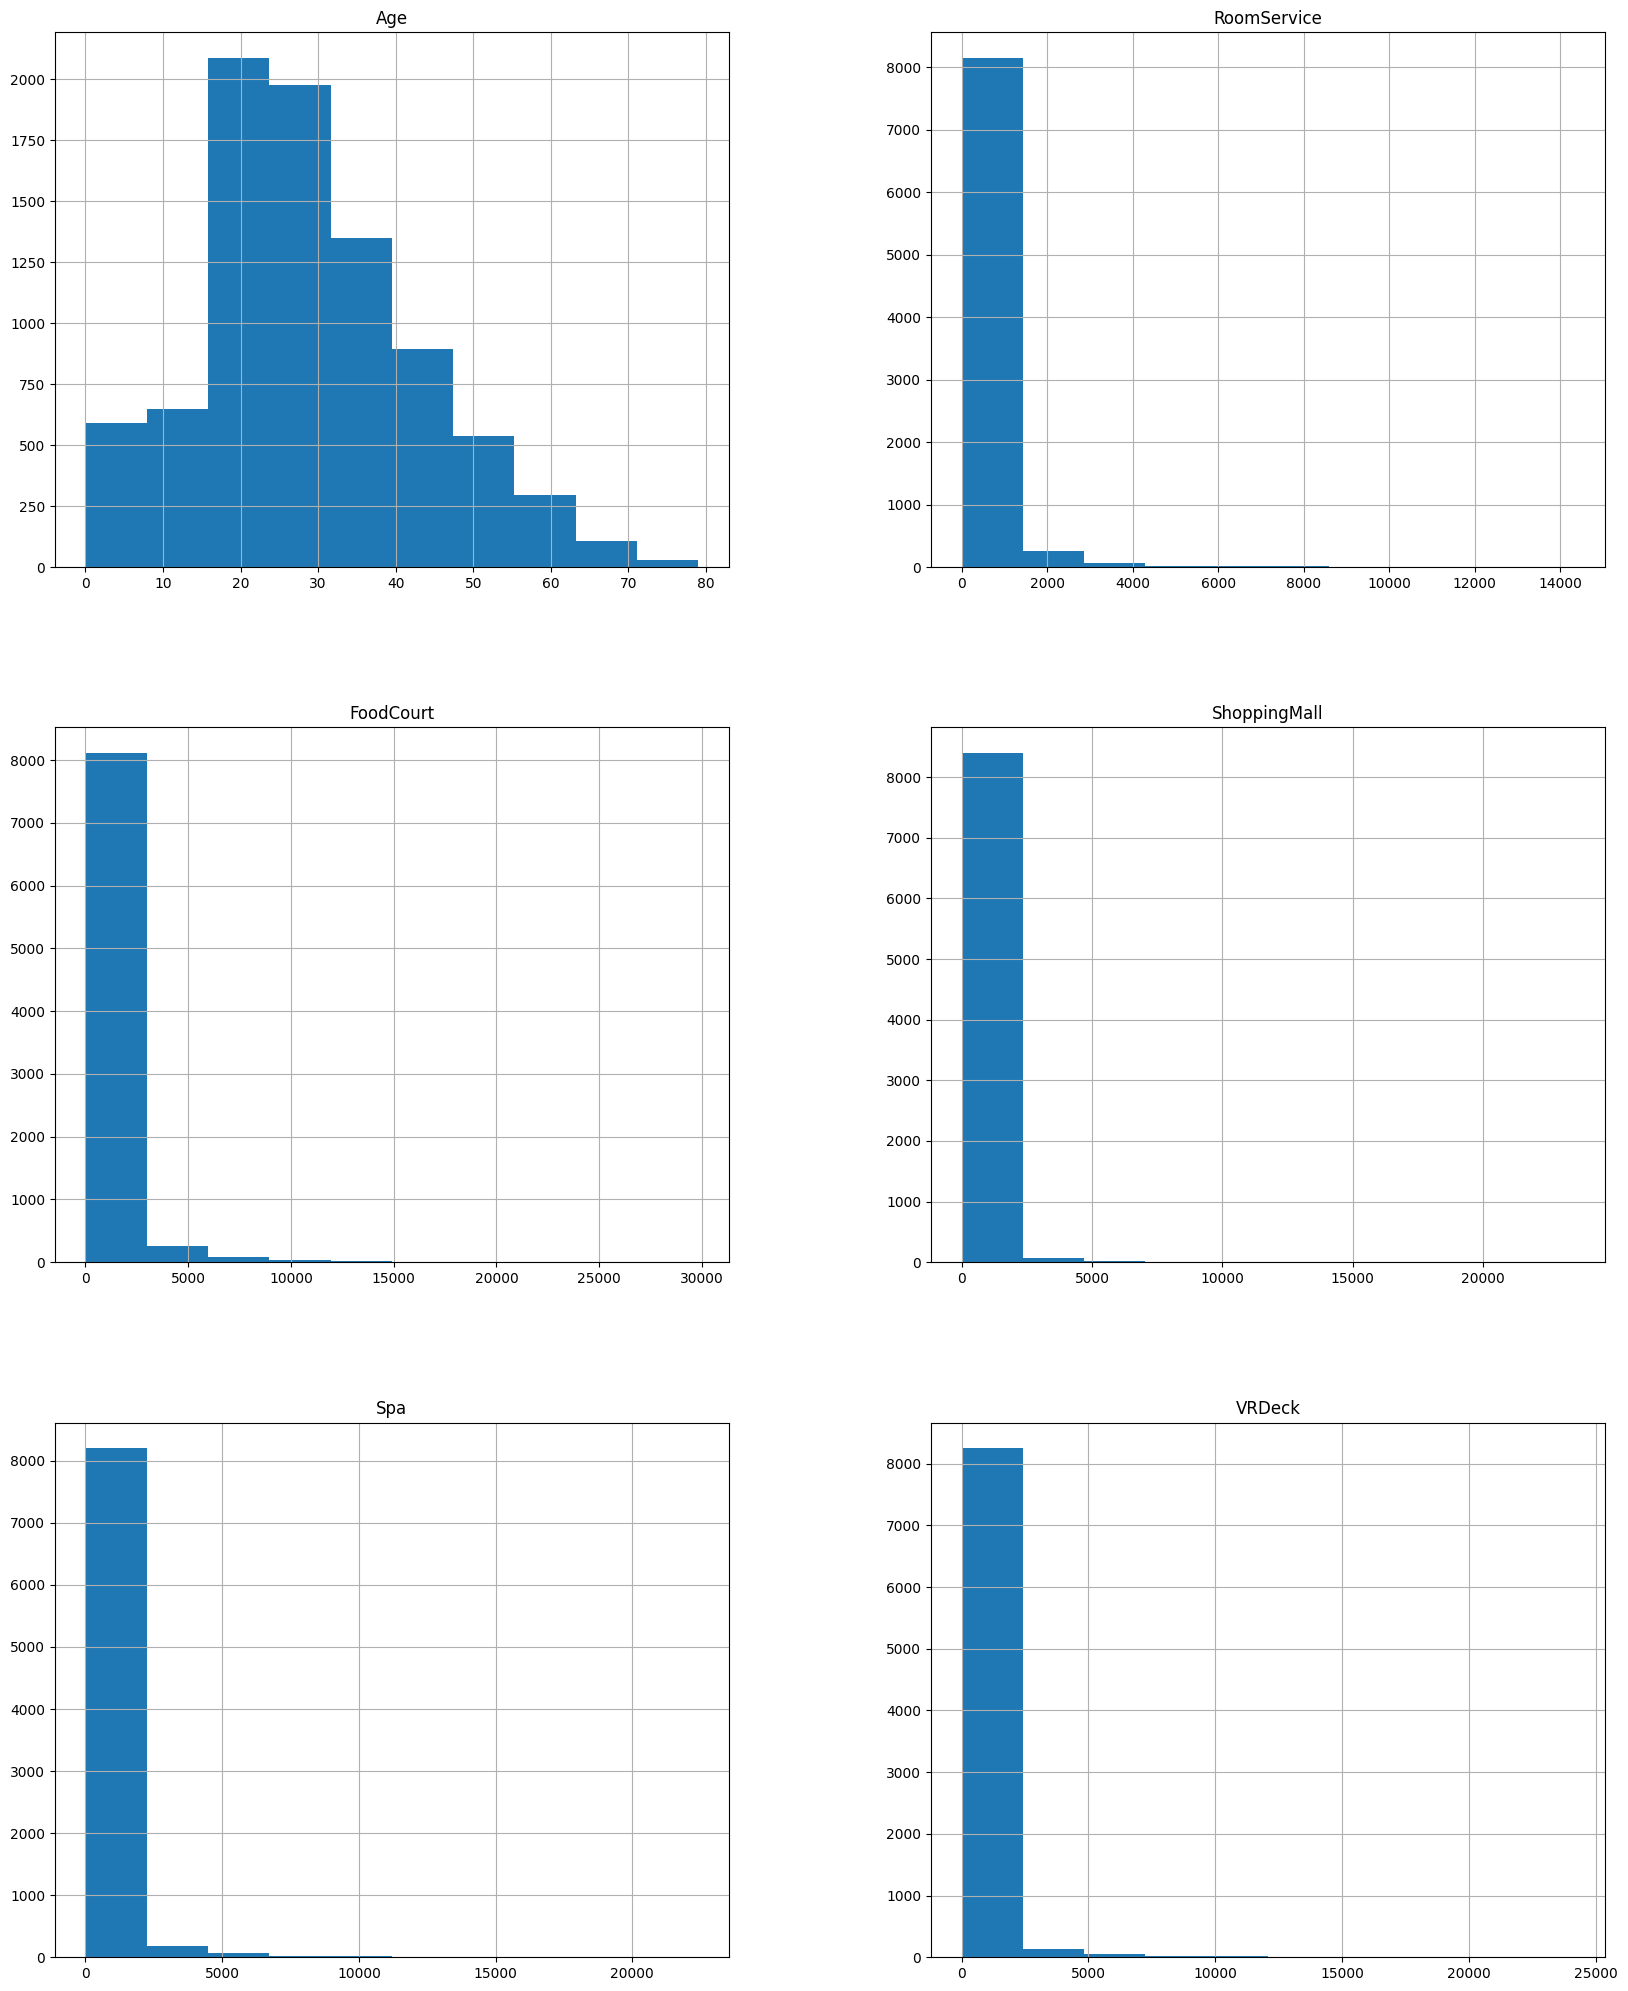

In [52]:
train_df.hist(figsize=(20,25))

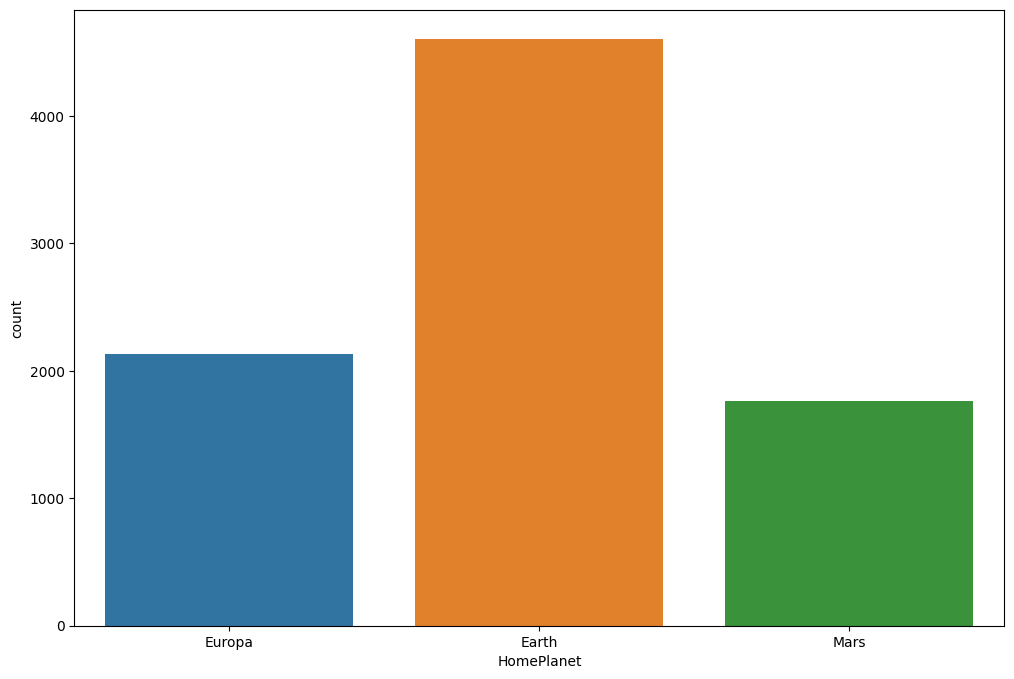

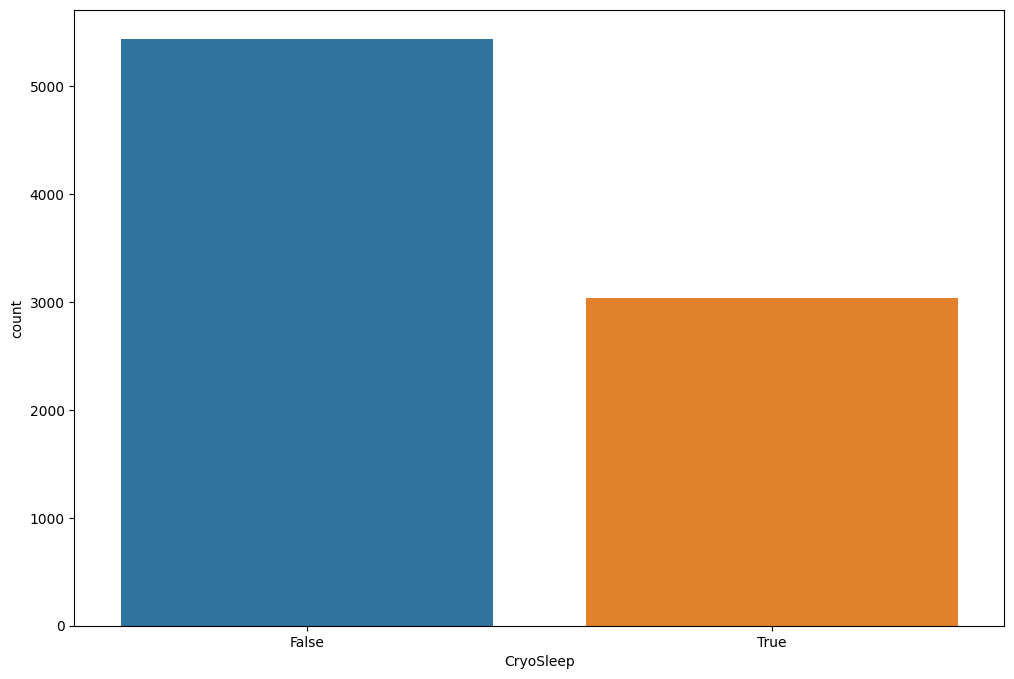

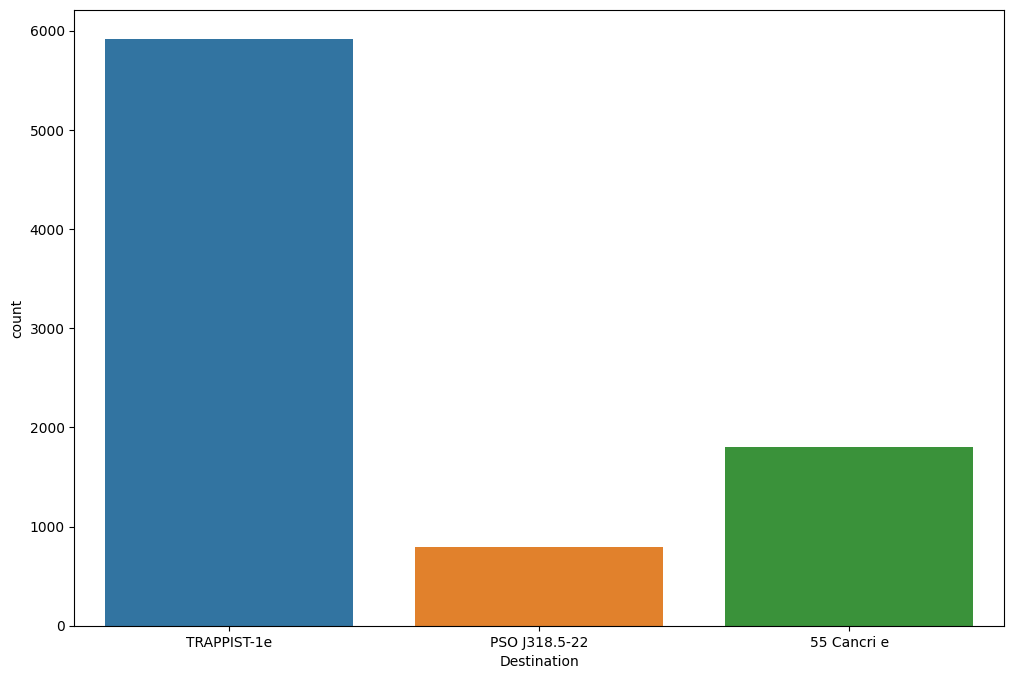

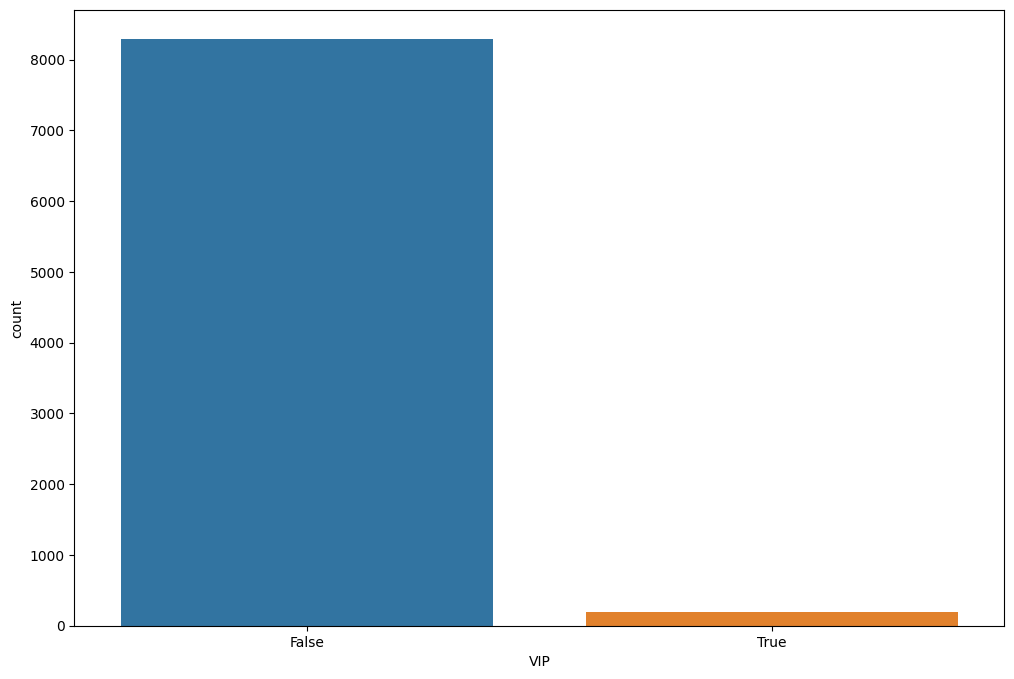

In [53]:
for column in ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']:
    plt.figure(figsize=(12,8))
    sns.countplot(x = train_df[column])
    plt.show()

In [54]:
train_df[['Deck', 'Num', 'Side']] = train_df['Cabin'].str.split('/', expand=True)
train_df = train_df.drop('Cabin', axis = 1)
test_df[['Deck', 'Num', 'Side']] = test_df['Cabin'].str.split('/', expand=True)
test_df = test_df.drop('Cabin', axis = 1)
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Num,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,F,1,S


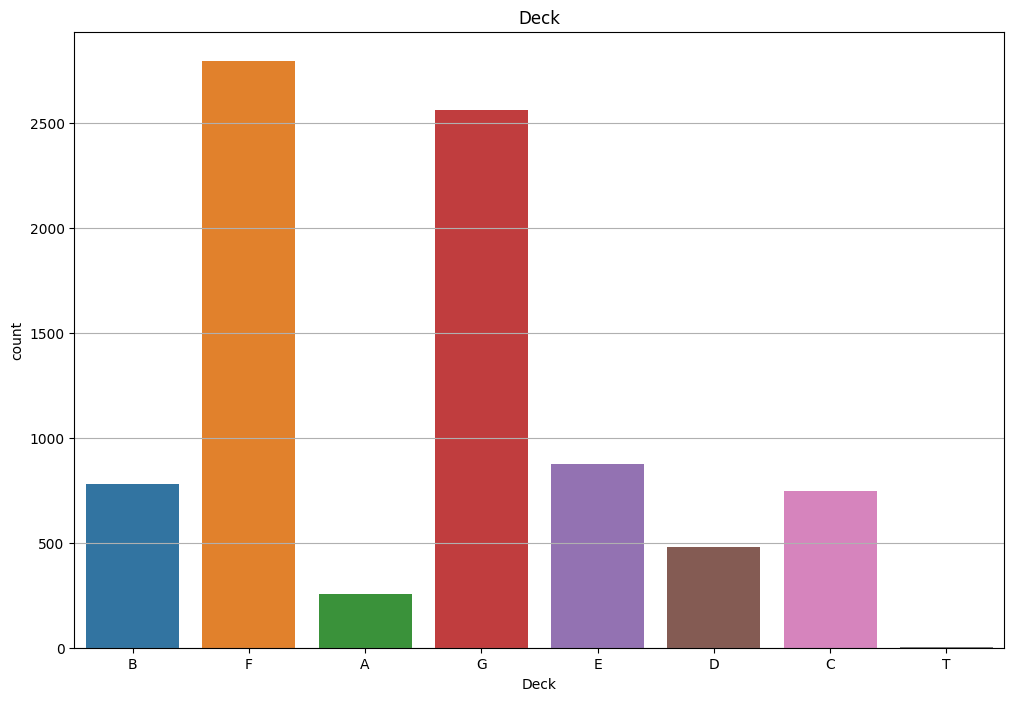

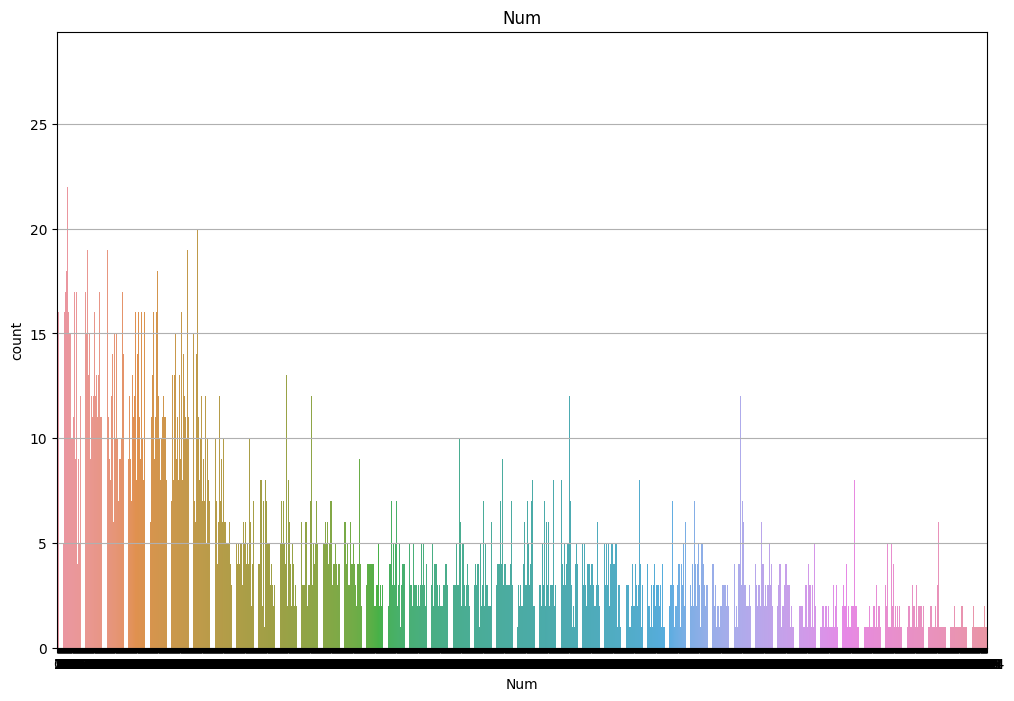

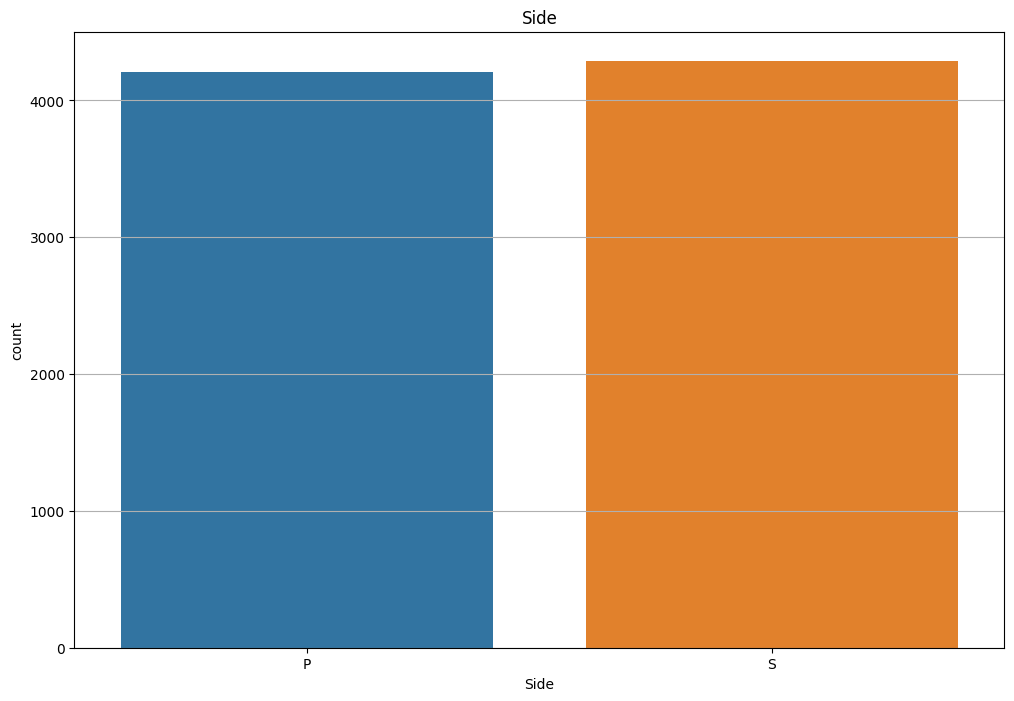

In [55]:
for column in ['Deck', 'Num', 'Side']:
    plt.figure(figsize=(12,8))
    plt.grid()
    sns.countplot(x=train_df[column])
    plt.title(column)
    plt.show()

In [56]:
mean = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Age']
mode = ['Destination', 'VIP']
random_value = ['CryoSleep', 'HomePlanet', 'Num', 'Deck', 'Side']
def fill_columns_with_values(df: pd.DataFrame, mean=[], mode=[], random_value=[]) -> pd.DataFrame:

    for column in mean:
        if column in df.columns:
            df[column].fillna(df[column].mean(), inplace=True)

    for column in mode:
        if column in df.columns:
            df[column].fillna(df[column].mode().values[0], inplace=True)

    for column in random_value:
        if column in df.columns:
            unique_values = df[column].unique()
            unique_values = unique_values[~pd.isna(unique_values)]
            for index, value in df[column].items():
                if pd.isnull(value):
                    df.at[index, column] = random.choice(unique_values)
    return df

train_df = fill_columns_with_values(train_df, mean = mean, mode = mode, random_value=random_value)
test_df = fill_columns_with_values(test_df, mean = mean, mode = mode, random_value=random_value)
train_df = train_df.drop('Name', axis = 1)
test_df = test_df.drop('Name', axis = 1)
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,F,1,S


In [57]:
train_df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Deck            0
Num             0
Side            0
dtype: int64

In [58]:
def one_hot_encode_columns(df: pd.DataFrame, *columns) -> pd.DataFrame:
    for column_name in columns:
        encoded_column = pd.get_dummies(df[column_name], prefix=column_name, drop_first=False)
        df = df.drop(column_name, axis=1)
        df = pd.concat([df, encoded_column], axis=1)
    return df

train_df = one_hot_encode_columns(train_df, ['HomePlanet', 'Destination', 'Deck', 'Side'])
test_df = one_hot_encode_columns(test_df, ['HomePlanet', 'Destination', 'Deck', 'Side'])
train_df.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0001_01,False,39.0,False,0.0,0.0,0.0,0.0,0.0,0,...,0,1,0,0,0,0,0,0,1,0
1,0002_01,False,24.0,False,109.0,9.0,25.0,549.0,44.0,0,...,0,0,0,0,0,1,0,0,0,1
2,0003_01,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,...,1,0,0,0,0,0,0,0,0,1
3,0003_02,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,...,1,0,0,0,0,0,0,0,0,1
4,0004_01,False,16.0,False,303.0,70.0,151.0,565.0,2.0,1,...,0,0,0,0,0,1,0,0,0,1


In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(train_df)
X_test = sc.fit_transform(test_df)

In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, criterion='entropy')
rfc.fit(X_train, y)
resultRFC = rfc.predict(X_test)
resultRFC = pd.DataFrame(resultRFC)
id_df = test_df.iloc[:, 0]
id_df = pd.DataFrame(id_df)
mergedRFC_df = pd.concat([id_df, resultRFC], axis=1)
mergedRFC_df = mergedRFC_df.rename(columns={0: 'Transported'})
importances = rfc.feature_importances_

In [61]:
print(importances)

[0.1274917  0.08120082 0.10842092 0.0023732  0.08125373 0.07169
 0.06342959 0.09662408 0.08265212 0.12266716 0.02150526 0.01991743
 0.00922678 0.00998961 0.00611972 0.0107727  0.00232629 0.00704705
 0.00654468 0.00369673 0.0129109  0.01477412 0.01452393 0.00065217
 0.01102501 0.01116432]


In [62]:
indices = np.argsort(importances)[::-1]
print(indices)

[ 0  9  2  7  8  4  1  5  6 10 11 21 22 20 25 24 15 13 12 17 18 14 19  3
 16 23]


In [63]:
X_train = np.delete(X_train, [23,3,16,19,17,18,14,13], axis=1)
X_test = np.delete(X_test, [23,3,16,19,17,18,14,13], axis=1)

In [64]:
from sklearn.svm import SVC
classifierSVC = SVC(kernel='rbf')
classifierSVC.fit(X_train, y)
resultSVC = classifierSVC.predict(X_test)
resultSVC = pd.DataFrame(resultSVC)
mergedSVC_df = pd.concat([id_df, resultSVC], axis=1)
mergedSVC_df = mergedSVC_df.rename(columns={0: 'Transported'})
mergedSVC_df.to_csv('sample_submission.csv', index=False)